In [27]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

import sys


sys.path.append('../viz')
sys.path.append('../')
sys.path.append('../..')

import optimneuralts
import viz_config
from utils import *


saves_path = '../saves'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
# Cible a predire / prediction effectue x,y plot
exp = "50_rx_100000_combis_4_patterns_42_256grad"
dataset = "50_rx_100000_combis_4_patterns_42"
seed = 3
combis, risks, pat_vecs, n_obs, n_dim = load_dataset(dataset, path_to_dataset="../datasets")

max_risk = risks.max().cpu().numpy()

model = torch.load(f"{saves_path}/{exp}/agents/{seed}.pth")

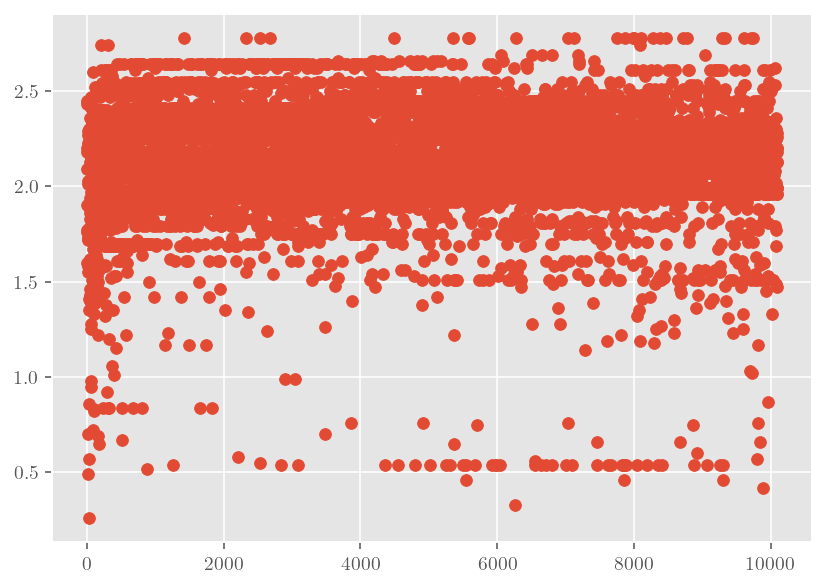

In [32]:
y = max_risk - model.reward_history.cpu().numpy() 
x = list(range(len(y)))
plt.scatter(x, y)



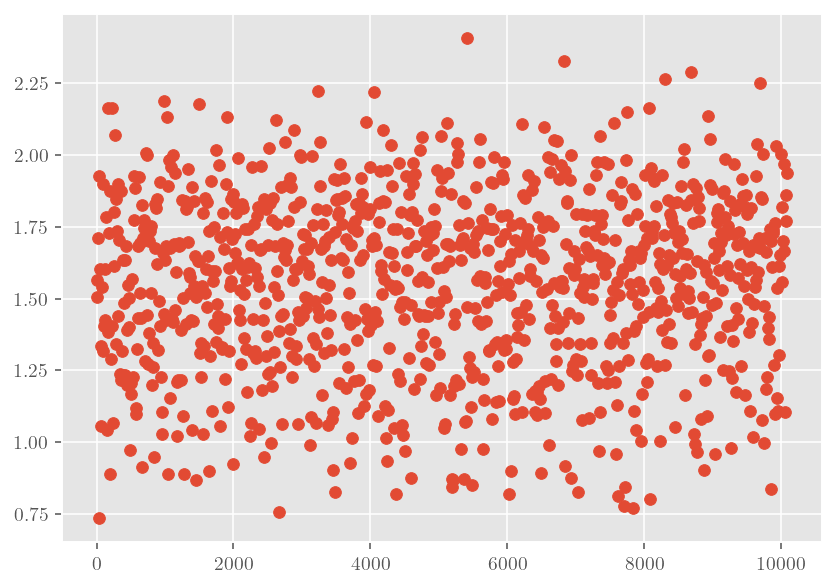

In [30]:
y = model.net(model.vec_history).detach().cpu().numpy()
x = list(range(len(y)))
plt.scatter(x[::10], y[::10])